In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import re
from IPython.display import Image


In [134]:
%matplotlib inline 

In [135]:
telco_df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [136]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [137]:
telco_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [138]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [139]:
insight = []

for col in telco_df.columns:
    if telco_df.loc[:, col].nunique() <= 5:
        # Append the column name, number of unique values, unique values, and data type to the insight
        insight.append([col, telco_df.loc[:, col].nunique(), telco_df.dtypes[col]])
    else:
        # Otherwise, append only the column name, number of unique values, and data type to the insight
        insight.append([col, telco_df.loc[:, col].nunique(), telco_df.dtypes[col]])

insight_df=pd.DataFrame(insight,columns=['Column','Unique_Values','Data_Types'])
print(insight_df)


              Column  Unique_Values Data_Types
0         customerID           7043     object
1             gender              2     object
2      SeniorCitizen              2      int64
3            Partner              2     object
4         Dependents              2     object
5             tenure             73      int64
6       PhoneService              2     object
7      MultipleLines              3     object
8    InternetService              3     object
9     OnlineSecurity              3     object
10      OnlineBackup              3     object
11  DeviceProtection              3     object
12       TechSupport              3     object
13       StreamingTV              3     object
14   StreamingMovies              3     object
15          Contract              3     object
16  PaperlessBilling              2     object
17     PaymentMethod              4     object
18    MonthlyCharges           1585    float64
19      TotalCharges           6531     object
20           

Senior Citizen column should be a categorical feature.

In [140]:
telco_df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [141]:
pattern = r'\D+'  # Matches any non-digit character

telco_df['TotalCharges']=telco_df['TotalCharges'].apply(lambda x: re.sub(pattern, '', str(x)))
telco_df['TotalCharges']=pd.to_numeric(telco_df['TotalCharges'])

In [142]:
telco_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [143]:
mean_na=telco_df['TotalCharges'].mean()
telco_df['TotalCharges']=telco_df['TotalCharges'].fillna(mean_na)
telco_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

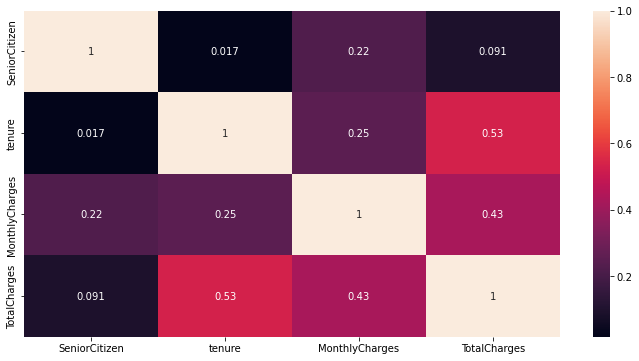

In [144]:
corr_data=telco_df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_data,annot=True)

In [145]:
telco_df['SeniorCitizen']=telco_df['SeniorCitizen'].replace({1 :'Yes',0:'No'})

In [146]:
cat_cols= []

for i in telco_df.columns:
    unique_val=telco_df[i].nunique()
    if unique_val<=5:
        cat_cols.append(i)

In [147]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [148]:
cat_cols.remove('Churn')

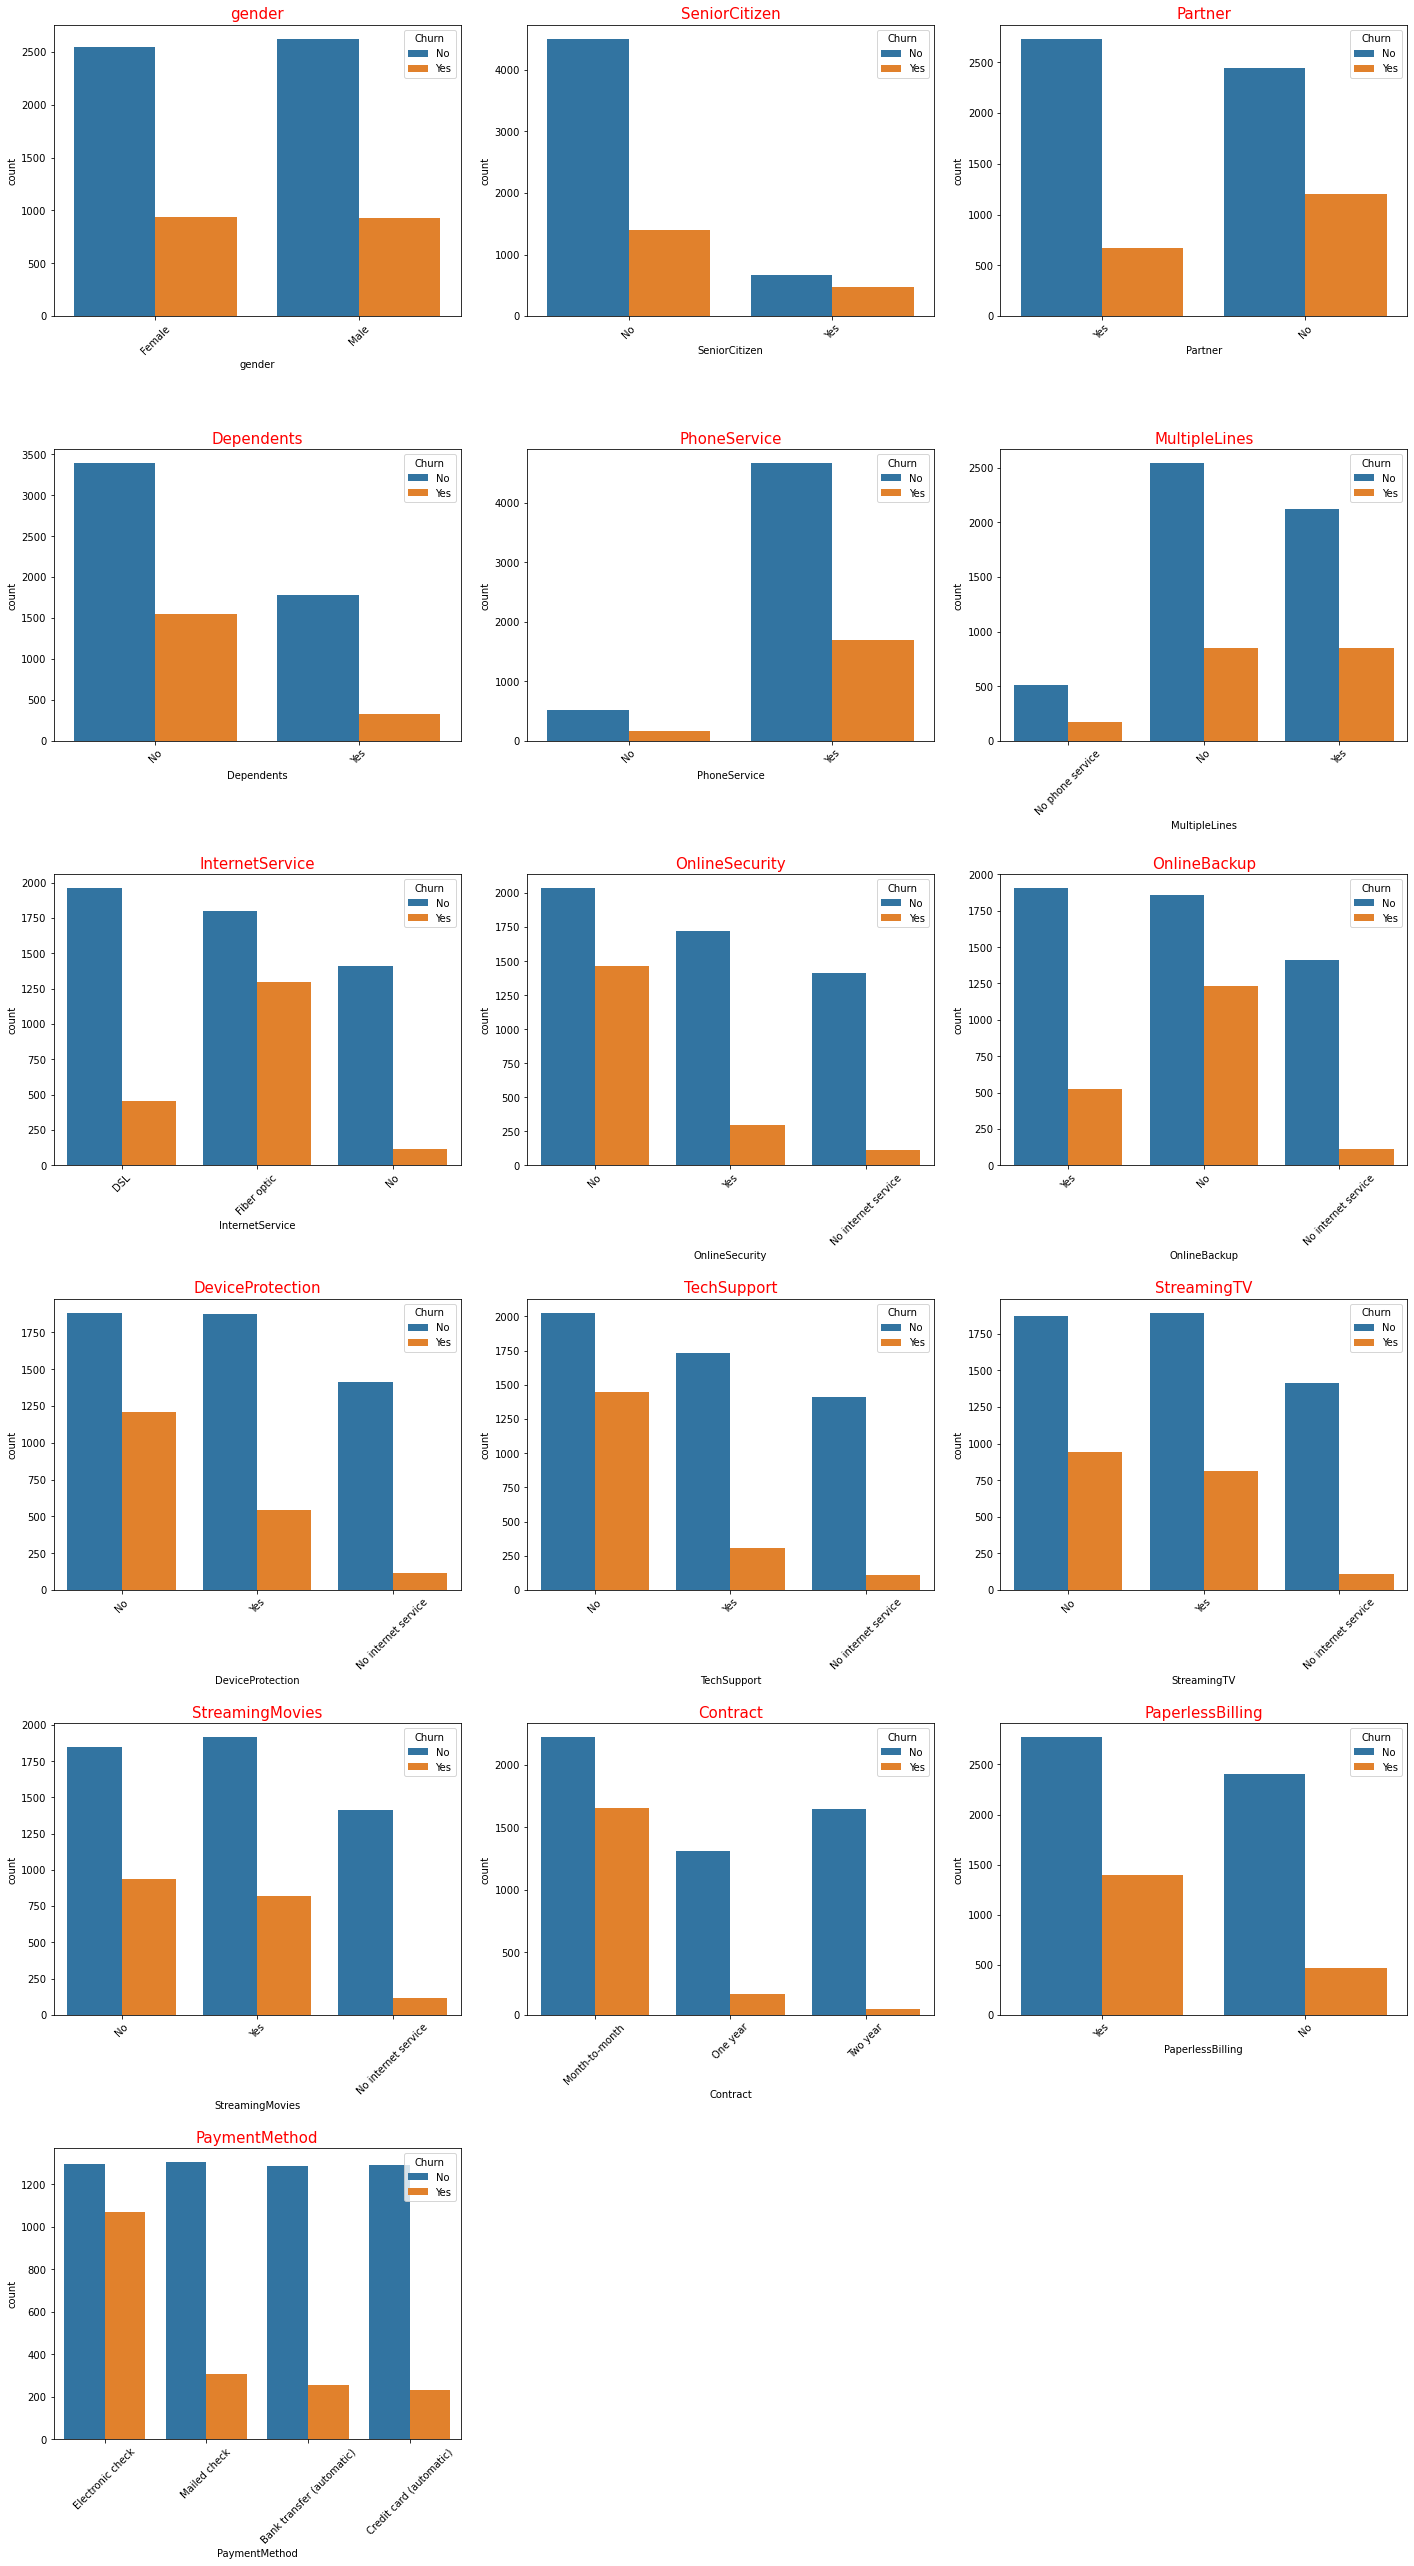

In [149]:

# Calculate the number of rows needed based on the number of category columns
num_rows = (len(cat_cols) + 2) // 3  # Round up division

# Create subplots with three columns
fig, axs = plt.subplots(num_rows, 3, figsize=(20, 6*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through each category column and create a countplot in the corresponding subplot
for i, col in enumerate(cat_cols):
    sns.countplot(data=telco_df, x=col, ax=axs[i],hue='Churn')
    axs[i].set_title(col, fontsize=15, color="red")
    axs[i].tick_params(axis='x', rotation=45)  

  
    
# Remove empty subplots if the number of category columns is not divisible by 3
if len(cat_cols) % 3 != 0:
    for j in range(len(cat_cols) % 3, 3):
        fig.delaxes(axs[-j])

plt.tight_layout(pad=2.0)
plt.show()


In [150]:
num_col= []

for i in telco_df.columns:
    unique_val=telco_df[i].nunique()
    if unique_val>5:
        num_col.append(i)

In [151]:
num_col

['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [152]:
telco_df[num_col]

,customerID,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,1,29.85,2985.0
1,5575-GNVDE,34,56.95,18895.0
2,3668-QPYBK,2,53.85,10815.0
3,7795-CFOCW,45,42.30,184075.0
4,9237-HQITU,2,70.70,15165.0
...,...,...,...,...
7038,6840-RESVB,24,84.80,19905.0
7039,2234-XADUH,72,103.20,73629.0
7040,4801-JZAZL,11,29.60,34645.0
7041,8361-LTMKD,4,74.40,3066.0


In [153]:
num_col.remove('customerID')


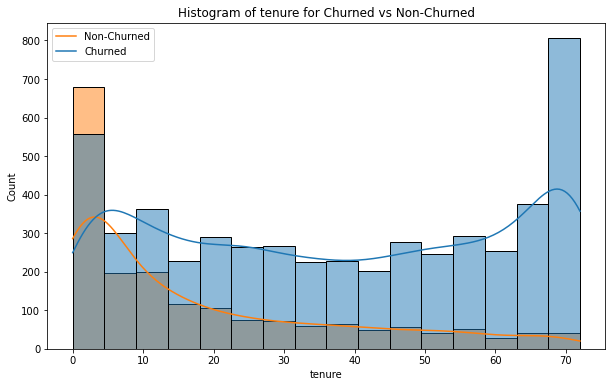

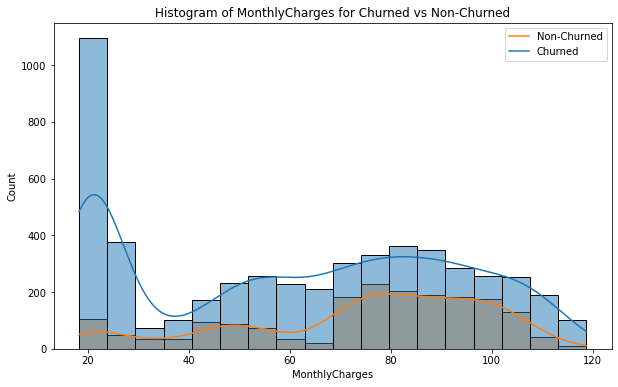

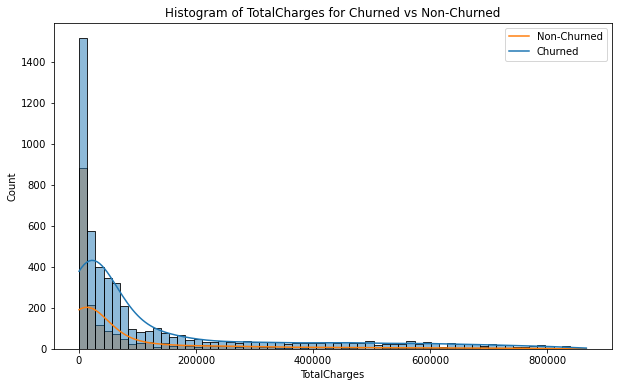

In [154]:

# Assuming 'churn' is a column indicating churn status ("Yes" or "No")
# Assuming 'num_col' is a list of numerical columns
for col in num_col:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=telco_df, x=col, hue='Churn', kde=True)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Histogram of {col} for Churned vs Non-Churned')
    plt.legend(['Non-Churned', 'Churned'])
    plt.show()


In [70]:
!pip install -U  kaleido

In [155]:
import plotly.graph_objects as go

# Assuming 'churn' is a column indicating churn status ("Yes" or "No")
# Assuming 'num_col' is a list of numerical columns

for col in num_col:
    fig = go.Figure()
    for churn_status in ['Yes', 'No']:
        fig.add_trace(go.Histogram(x=telco_df[telco_df['Churn'] == churn_status][col], name=churn_status))

    fig.update_layout(
        title=f'Histogram of {col} for Churned vs Non-Churned',
        xaxis_title=col,
        yaxis_title='Count'
    )
    fig.show()
    
pio.write_image(fig, 'histogram1.png')


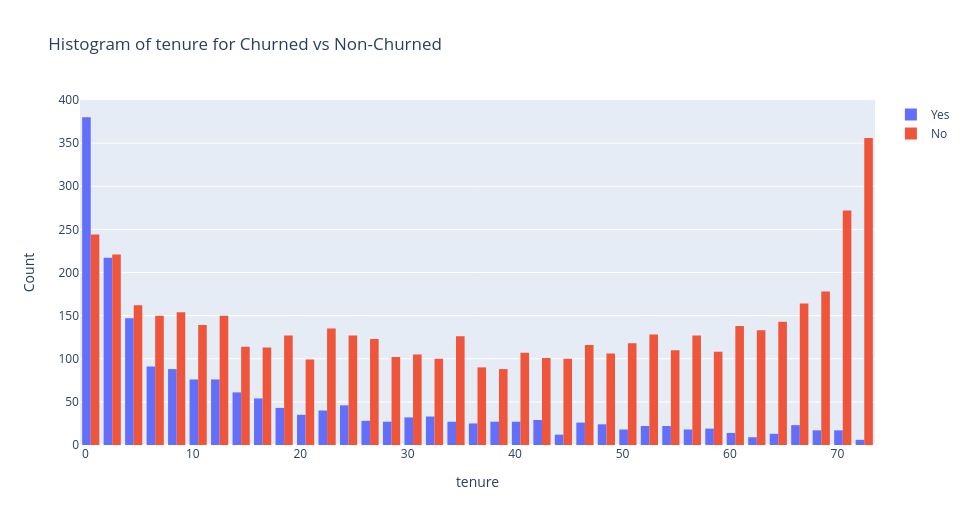

In [219]:

image_path1 = 'newplot (3).png'
image_path2= 'newplot (4).png'
image_path3= 'newplot (5).png'

# Display the image
Image(filename=image_path1)


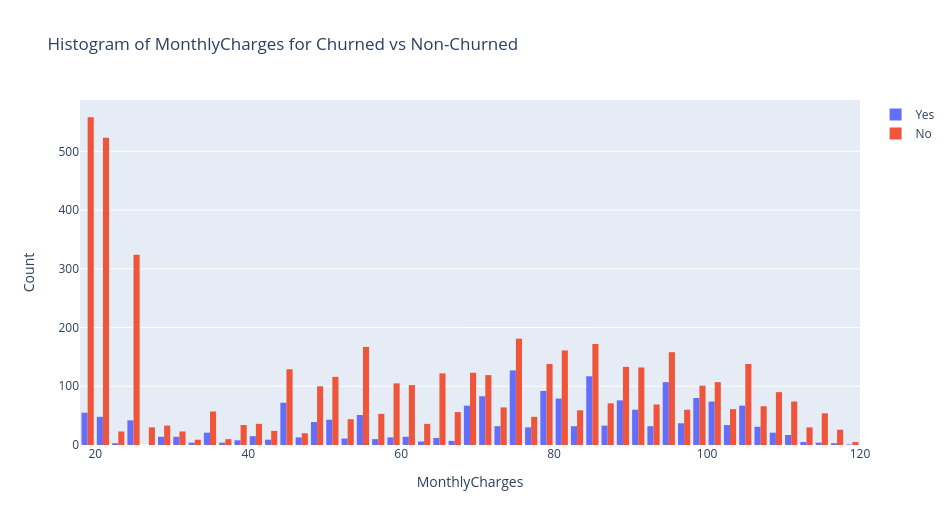

In [220]:
Image(filename=image_path2)


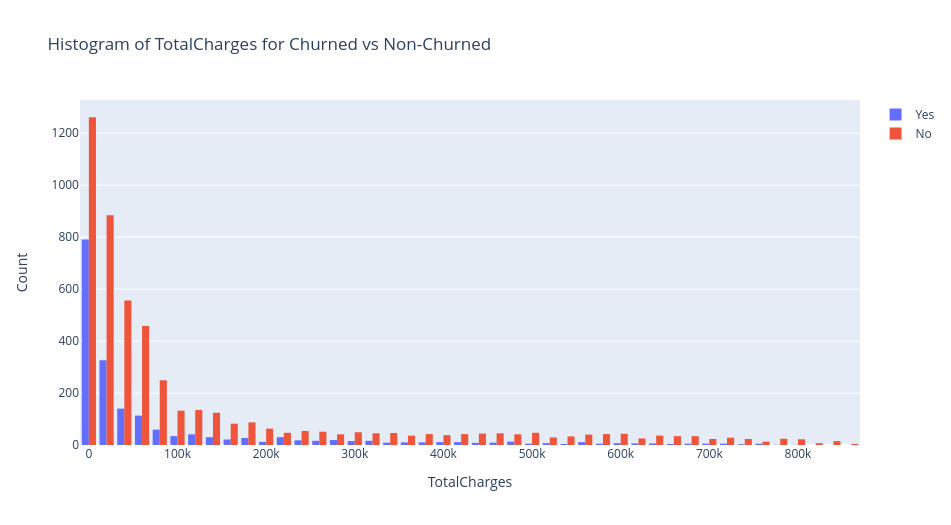

In [221]:
Image(filename=image_path3)

In [156]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,2985.0,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,18895.0,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,10815.0,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,184075.0,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,15165.0,Yes


In [157]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [158]:
telco_df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [159]:
y=telco_df['Churn']
telco_df.drop(columns='Churn',inplace=True)

In [160]:
from sklearn.decomposition import PCA

In [161]:
pca_df=telco_df[['tenure','MonthlyCharges', 'TotalCharges']]

In [162]:
pca_df.dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [163]:
pca_df.isna().sum()

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [164]:
pca=PCA(n_components=3)

In [165]:
pca.fit(pca_df)

PCA(n_components=3)

In [166]:
transformed=pca.transform(pca_df)

In [167]:
result = pd.DataFrame(transformed,columns=['PCA1','PCA2','PCA3'])

In [168]:
result

,PCA1,PCA2,PCA3
0,-123266.912329,-27.719080,-21.691048
1,-107356.908340,-0.214961,8.968435
2,-115436.910693,-4.246454,-22.326070
3,57823.090677,-25.890802,9.911187
4,-111086.909586,12.280647,-23.398677
...,...,...,...
7038,-106346.907165,27.064913,-2.391885
7039,-52622.902907,43.935996,41.202155
7040,-91606.911809,-29.715228,-13.747321
7041,-123185.909147,16.916913,-20.788253


In [169]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [170]:
#features to drop
drop_features=['customerID']

In [171]:
dummy_features=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [172]:
telco_df=telco_df.drop(drop_features,axis=1)

In [173]:
telco_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,2985.0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,18895.0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,10815.0
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,184075.0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,15165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,19905.0
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,73629.0
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,34645.0
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,3066.0


In [174]:
telco_df=pd.get_dummies(data=telco_df,columns=dummy_features,drop_first=True)

In [109]:
telco_df

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,2985.0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,18895.0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,10815.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,184075.0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,15165.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,19905.0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,72,103.20,73629.0,0,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,11,29.60,34645.0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,4,74.40,3066.0,1,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [176]:
telco_df_pca=pd.concat([telco_df,result],axis=1)

In [177]:
telco_df_pca.head(10)

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PCA1,PCA2,PCA3
0,1,29.85,2985.0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,-123266.912329,-27.719080,-21.691048
1,34,56.95,18895.0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,-107356.908340,-0.214961,8.968435
2,2,53.85,10815.0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,-115436.910693,-4.246454,-22.326070
3,45,42.30,184075.0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,57823.090677,-25.890802,9.911187
4,2,70.70,15165.0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,-111086.909586,12.280647,-23.398677
5,8,99.65,8205.0,0,0,0,0,1,0,1,...,1,0,0,1,0,1,0,-118046.907210,41.967104,-18.310340
6,22,89.10,19494.0,1,0,0,1,1,0,1,...,0,0,0,1,1,0,0,-106757.907012,31.295176,-4.564580
7,10,29.75,3019.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,-123232.911723,-27.399401,-12.698465
8,28,104.80,304605.0,0,0,1,0,1,0,1,...,1,0,0,1,0,1,0,178353.093147,27.309960,-17.831329
9,62,56.15,348795.0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,222543.092011,-22.784496,15.541058


In [178]:
telco_df.head(10)

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,2985.0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,18895.0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,10815.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,184075.0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,15165.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
5,8,99.65,8205.0,0,0,0,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
6,22,89.10,19494.0,1,0,0,1,1,0,1,...,0,1,0,0,0,0,1,1,0,0
7,10,29.75,3019.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,28,104.80,304605.0,0,0,1,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
9,62,56.15,348795.0,1,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

### Train Test Split

In [209]:
#train_test_split for original dataframe 

X=telco_df
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [210]:
X.shape

(7043, 30)

In [211]:
y.shape

(7043,)

In [212]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost Classifier',AdaBoostClassifier()),
    ('Gradient Boosting Classifier',GradientBoostingClassifier())
     
]

In [213]:
# Train the model
for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)  # Make predictions on the test set
    acc_score = accuracy_score(y_test, y_pred)  # Calculate the accuracy score
    print(f'{name} Accuracy Score: {acc_score:.2f}')

# Identify the best-performing model based on accuracy score
best_model_name, best_model = max(models, key=lambda x: accuracy_score(y_test, x[1].predict(X_test)))

print(f'The best-performing model is {best_model_name} with an accuracy score of {accuracy_score(y_test, best_model.predict(X_test)):.2f}')

Logistic Regression Accuracy Score: 0.82
Decision Tree Accuracy Score: 0.72
Random Forest Accuracy Score: 0.79
AdaBoost Classifier Accuracy Score: 0.82
Gradient Boosting Classifier Accuracy Score: 0.81
The best-performing model is Logistic Regression with an accuracy score of 0.82


In [214]:
##train_test_split for PCA dataframe 
X_pca=telco_df_pca
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train_pca=scaler.fit_transform(X_train)
X_test_pca=scaler.transform(X_test)

In [215]:
for name, model in models:
    model.fit(X_train_pca,y_train_pca)
    y_pred_pca=model.predict(X_test_pca)
    acc_score_pca=accuracy_score(y_test_pca,y_pred_pca)
    print(f'{name} Accuracy Score: {acc_score_pca:.2f}')

# Identify the best-performing model based on accuracy score
best_model_name, best_model = max(models, key=lambda x: accuracy_score(y_test_pca, x[1].predict(X_test_pca)))

print(f'The best-performing model is {best_model_name} with an accuracy score of {accuracy_score(y_test_pca, best_model.predict(X_test_pca)):.2f}')

Logistic Regression Accuracy Score: 0.82
Decision Tree Accuracy Score: 0.72
Random Forest Accuracy Score: 0.79
AdaBoost Classifier Accuracy Score: 0.82
Gradient Boosting Classifier Accuracy Score: 0.81
The best-performing model is Logistic Regression with an accuracy score of 0.82


###### Although both the original dataframe and the dataframe on which a Principal Component Analysis (PCA) had  82 as the highest accuracy score , the PCA dataframe had more models scoring higher compared to that of the original dataframe.

In [233]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline


In [263]:
logregression=LogisticRegression()

In [255]:

# Convert 'Yes' to 1 and 'No' to 0
y = y.replace({'Yes': 1, 'No': 0})

kf=KFold(n_splits=5,shuffle=True,random_state=42)
param_dist = {'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}  # Use 'ridge__alpha' for the Ridge hyperparameter
ridge=Ridge()

# Create a pipeline with PCA and Ridge regression
pipeline = Pipeline([
    ('pca', PCA(n_components=3)),  # Adjust the number of components as needed
    ('ridge', ridge)
])



random_search = RandomizedSearchCV(estimator=logregression,pipeline, param_distributions=param_dist, scoring="accuracy",n_iter=5, cv=kf, random_state=42)


# Perform the random search on the full data
random_search.fit(X_pca, y)

# Get the best hyperparameters from the random search
best_params = random_search.best_params_

# Train the model with the best hyperparameters on the full data
best_ridge_model = Ridge(alpha=best_params['ridge__alpha'])  # Use 'ridge__alpha' to access the Ridge hyperparameter
best_ridge_model.fit(X_pca, y)

best_p=random_search.best_params_

print(best_p)

#Retrieve the best estimator and run your prediction



In [270]:
logregression.fit(X_train_pca,y_train_pca)

LogisticRegression()

### Predictions and Evaluations
** Now predict values for the testing data.**

In [274]:
predictions=logregression.predict(X_test_pca)

**Create a classification report for the model.**


In [272]:
from sklearn.metrics import classification_report


In [276]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1036
         Yes       0.69      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



In [277]:
# Making predictions on the test set
y_test_pred=logregression.predict(X_test_pca)

In [278]:
# Accuracy score on the test set.
print('Accuracy score for test data is:', accuracy_score(y_test_pca, y_test_pred))

Accuracy score for test data is: 0.8197303051809794


In [279]:
import pickle
pickle.dump(logregression,open('logreg.pkl','wb'))